# DA5401 A6: Imputation via Regression for Missing Data

Submitted by Sanved Bangale (**DA25M027**)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('Set2')

In [4]:
np.random.seed(42)

## A. Data Pre-Processing and Imputation

### Prepping

In [5]:
df = pd.read_csv('UCI_Credit_Card.csv')
print(df.shape)

(30000, 25)


In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [8]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

There are no missing values in this data set. \
The dataset is clean. 

I'll introduce some missing values in `AGE` and `BILL_AMT1`. 

In [9]:
df_with_missing = df.copy()

In [10]:
cols_to_nan = ['AGE', 'BILL_AMT1']

In [11]:
for col in cols_to_nan:
    indices = df_with_missing.index
    missing_count = int(0.05 * len(indices))
    missing_indices = np.random.choice(indices, size=missing_count, replace=False)
    df_with_missing.loc[missing_indices, col] = np.nan
    print(f'added {missing_count} NaN values to col {col}')

added 1500 NaN values to col AGE
added 1500 NaN values to col BILL_AMT1


In [12]:
print('missing values:')
print(df_with_missing[cols_to_nan].isna().sum())

missing values:
AGE          1500
BILL_AMT1    1500
dtype: int64


I've introduced $5\%$ missing values (`NaN`) to each of `AGE` and `BILL_AMT1`.

Total instances: $30,000$ \
Removed $5\%$ of $30,000$ = $1500$

### Dataset A: Imputation using Median

I'll replace the missing values with the median value of the respective attributes. 

In [13]:
dataset_A = df_with_missing.copy()

In [14]:
print('before imputation:')
print(dataset_A[['AGE', 'BILL_AMT1']].isna().sum())

before imputation:
AGE          1500
BILL_AMT1    1500
dtype: int64


In [15]:
for col in cols_to_nan:
    col_median = dataset_A[col].median()
    dataset_A[col] = dataset_A[col].fillna(col_median)

In [16]:
print("after imputation:")
print(dataset_A[['AGE', 'BILL_AMT1']].isna().sum())
print(f'\nshape: {dataset_A.shape}')

after imputation:
AGE          0
BILL_AMT1    0
dtype: int64

shape: (30000, 25)


We use median for imputation instead of the mean. \
This is because unlike the mean, the median is robust to oultiers. \
There can be outliers in the data that can affect the mean heavily. \
The median reflects the data without being affected by those outliers. \

### Dataset B: Imputation using Regression

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
dataset_B = df_with_missing.copy()
print(dataset_B[['AGE', 'BILL_AMT1']].isna().sum())

AGE          1500
BILL_AMT1    1500
dtype: int64


In [22]:
target_column = 'AGE'
missing_age_mask = dataset_B[target_column].isna()
non_missing_data = dataset_B[~missing_age_mask]  # without missing AGE data
missing_data = dataset_B[missing_age_mask]       # with missing AGE data

Each should be 1500.

In [23]:
exclude_cols = ['ID', target_column, 'default.payment.next.month', 'BILL_AMT1']
feature_columns = [col for col in dataset_B.columns if col not in exclude_cols]

print(f'feature colms are {feature_columns}')

feature colms are ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [24]:
X_train = non_missing_data[feature_columns]
y_train = non_missing_data[target_column]

In [25]:
X_missing = missing_data[feature_columns]

In [26]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
predicted_ages = lr_model.predict(X_missing)

In [28]:
dataset_B.loc[missing_age_mask, target_column] = predicted_ages

In [29]:
print(dataset_B[['AGE', 'BILL_AMT1']].isna().sum())

AGE             0
BILL_AMT1    1500
dtype: int64


Filled all missing `AGE` vals. 

In [30]:
print(dataset_B.shape)

(30000, 25)


In [33]:
print(f'for imputed ages:')
print(f'mean: {predicted_ages.mean():.2f}')
print(f'std dev: {predicted_ages.std():.2f}')
print(f'min, max: {predicted_ages.min():.2f}, {predicted_ages.max():.2f}')

for imputed ages:
mean: 35.46
std dev: 4.31
min, max: 24.27, 48.82


Explanation of MAR (Missing At Random) assumption:
The Linear Regression imputation method assumes the data is Missing At Random (MAR). 
This means that the probability of a value being missing depends only on other observed 
variables in the dataset, not on the missing value itself or unobserved variables.

In our case, we assume that whether AGE is missing can be explained by the other 
features we used as predictors (LIMIT_BAL, SEX, EDUCATION, etc.), not by the actual 
AGE value that we don't know. If this assumption holds, regression imputation can 
provide more accurate estimates than simple methods like median imputation.

For Dataset B, we imputed the missing values in the AGE column using Linear Regression. Only fully observed features (i.e., columns without missing values) were used as predictors, ensuring that the regression model could be trained without any NaNs. The Linear Regression model predicts the missing AGE values based on patterns in the other features. This method relies on the assumption that the missingness is Missing At Random (MAR) — meaning that the probability of a value being missing depends only on observed data and not on the missing value itself. This approach allows us to generate more informed imputations than simply using the median or mean.

### Dataset C: Imputation using Regression (non-linear)

In [39]:
dataset_C = df_with_missing.copy()
print(dataset_C[['AGE', 'BILL_AMT1']].isna().sum())
target_column = 'AGE'

AGE          1500
BILL_AMT1    1500
dtype: int64


In [40]:
missing_age_mask = dataset_C[target_column].isna()
non_missing_data = dataset_C[~missing_age_mask]  # without missin g ages
missing_data = dataset_C[missing_age_mask]       # with missing ages

There should be 1500 missing.

In [43]:
exclude_cols = ['ID', target_column, 'default.payment.next.month', 'BILL_AMT1']
feature_columns = [col for col in dataset_C.columns if col not in exclude_cols]
print(f'features used for predicting age: \n{feature_columns}')

features used for predicting age: 
['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [45]:
X_train = non_missing_data[feature_columns]
y_train = non_missing_data[target_column]

X_missing = missing_data[feature_columns]

In [34]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_missing_scaled = scaler.transform(X_missing)

In [47]:
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [48]:
predicted_ages_knn = knn_model.predict(X_missing_scaled)

In [49]:
dataset_C.loc[missing_age_mask, target_column] = predicted_ages_knn

In [54]:
print('after regressn. imputation (non lin):')
print(dataset_C[['AGE', 'BILL_AMT1']].isna().sum())

after regressn. imputation (non lin):
AGE             0
BILL_AMT1    1500
dtype: int64


In [57]:
print(f"stats of imputed ages:")
print(f'mean: {predicted_ages_knn.mean():.2f}')
print(f'std dev: {predicted_ages_knn.std():.2f}')
print(f'min, max: {predicted_ages_knn.min():.2f}, {predicted_ages_knn.max():.2f}')

stats of imputed ages:
mean: 35.24
std dev: 6.03
min, max: 23.00, 53.60


In [61]:
print(f'original age stats:')
print(f'mean: {y_train.mean():.2f}')
print(f'std dev: {y_train.std():.2f}')
print(f'min, max: {y_train.min():.2f}, {y_train.max():.2f}')

original age stats:
mean: 35.50
std dev: 9.21
min, max: 21.00, 79.00


For Dataset C, we used a K-Nearest Neighbors (KNN) Regressor to impute the missing AGE values. Similar to the linear regression approach, only fully observed features were used as predictors. The KNN model leverages non-linear relationships between the predictors and AGE by averaging the values of the closest neighbors in feature space. This method can capture more complex patterns than linear regression, potentially providing more accurate imputations when relationships between features and the target are non-linear.

## B: Model Training and Assessment

### Splitting

#### Creating dataset D

I'll complete the imputation for `BILL_AMT1` in Datasets B and C using median and will use median for simplicity to focus on comparing the AGE imputation methods

In [62]:
for dataset in [dataset_B, dataset_C]:
    bill_amt1_median = dataset['BILL_AMT1'].median()
    dataset['BILL_AMT1'] = dataset['BILL_AMT1'].fillna(bill_amt1_median)

Doing a sanity check:

In [70]:
print('after completing all imputations:')
print(f'Dataset A -> \t AGE: {dataset_A['AGE'].isna().sum()} \tBILL_AMT1: {dataset_A['BILL_AMT1'].isna().sum()}')
print(f'Dataset B -> \t AGE: {dataset_B['AGE'].isna().sum()} \tBILL_AMT1: {dataset_B['BILL_AMT1'].isna().sum()}')
print(f'Dataset C -> \t AGE: {dataset_C['AGE'].isna().sum()} \tBILL_AMT1: {dataset_C['BILL_AMT1'].isna().sum()}')

print(f'\nshapes: \n{dataset_A.shape}\n{dataset_B.shape}\n{dataset_C.shape}')

after completing all imputations:
Dataset A -> 	 AGE: 0 	BILL_AMT1: 0
Dataset B -> 	 AGE: 0 	BILL_AMT1: 0
Dataset C -> 	 AGE: 0 	BILL_AMT1: 0

shapes: 
(30000, 25)
(30000, 25)
(30000, 25)


Listwise deletion for the 4th dataset:

In [73]:
dataset_D = df_with_missing.dropna().copy()
print(f'shape: {dataset_D.shape}')
print(f'rows removed: {len(df_with_missing) - len(dataset_D)}')

shape: (27077, 25)
rows removed: 2923


In [74]:
feature_cols = [col for col in df_with_missing.columns if col not in ['ID', 'default.payment.next.month']]
target_col = 'default.payment.next.month'

In [76]:
print(f'feature columns: {feature_cols}')
print(f'len feature columns: {len(feature_cols)}')
print(f'target column: {target_col}')

feature columns: ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
len feature columns: 23
target column: default.payment.next.month


#### train_test_split for each of the datasets

Now the train test split part.

In [77]:
from sklearn.model_selection import train_test_split

In [79]:
datasets = {
    'A': dataset_A,
    'B': dataset_B, 
    'C': dataset_C,
    'D': dataset_D
}

splits = {}

In [80]:
for name, dataset in datasets.items():
    X = dataset[feature_cols]
    y = dataset[target_col]
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    splits[name] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }
    
    print(f'dataset {name}: ')
    print(f'train: {X_train.shape}, test: {X_test.shape}')
    print(f'target distribution: {y_train.mean():.3f}')

dataset A: 
train: (21000, 23), test: (9000, 23)
target distribution: 0.221
dataset B: 
train: (21000, 23), test: (9000, 23)
target distribution: 0.221
dataset C: 
train: (21000, 23), test: (9000, 23)
target distribution: 0.221
dataset D: 
train: (18953, 23), test: (8124, 23)
target distribution: 0.221


### setting up classifiers

I'll standardize the features in the 4 datasets.

In [81]:
scalers = {}
scaled_splits = {}

In [82]:
for name in splits.keys():
    scaler = StandardScaler()
    
    X_train_scaled = scaler.fit_transform(splits[name]['X_train'])
    X_test_scaled = scaler.transform(splits[name]['X_test'])
    
    scalers[name] = scaler
    scaled_splits[name] = {
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': splits[name]['y_train'],
        'y_test': splits[name]['y_test']
    }
    
    print(f'dataset {name}:')
    print(f'train mean: {X_train_scaled.mean():.4f}, \nstd dev: {X_train_scaled.std():.4f}\n')

dataset A:
train mean: -0.0000, 
std dev: 1.0000

dataset B:
train mean: -0.0000, 
std dev: 1.0000

dataset C:
train mean: 0.0000, 
std dev: 1.0000

dataset D:
train mean: 0.0000, 
std dev: 1.0000



### model evaluation

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

In [84]:
models = {}
results = {}

In [85]:
for name in scaled_splits.keys():
    print(f"\n{'-'*50}")
    print(f"eval on dataset {name}")
    print(f"{'-'*50}")
    
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    lr_model.fit(scaled_splits[name]['X_train'], scaled_splits[name]['y_train'])
    
    y_pred = lr_model.predict(scaled_splits[name]['X_test'])
    
    models[name] = lr_model
    results[name] = {
        'y_true': scaled_splits[name]['y_test'],
        'y_pred': y_pred
    }
    
    accuracy = accuracy_score(scaled_splits[name]['y_test'], y_pred)
    precision = precision_score(scaled_splits[name]['y_test'], y_pred)
    recall = recall_score(scaled_splits[name]['y_test'], y_pred)
    f1 = f1_score(scaled_splits[name]['y_test'], y_pred)
    
    results[name]['metrics'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    
    print(f"classification report for dataset {name}:")
    print(classification_report(scaled_splits[name]['y_test'], y_pred, digits=4))
    
    print(f"\tacc:  {accuracy:.4f}")
    print(f"\tprec: {precision:.4f}")
    print(f"\trecall:    {recall:.4f}")
    print(f"\tf1-score:  {f1:.4f}")


--------------------------------------------------
eval on dataset A
--------------------------------------------------
classification report for dataset A:
              precision    recall  f1-score   support

           0     0.8175    0.9710    0.8877      7009
           1     0.6993    0.2371    0.3541      1991

    accuracy                         0.8087      9000
   macro avg     0.7584    0.6041    0.6209      9000
weighted avg     0.7914    0.8087    0.7697      9000

	acc:  0.8087
	prec: 0.6993
	recall:    0.2371
	f1-score:  0.3541

--------------------------------------------------
eval on dataset B
--------------------------------------------------
classification report for dataset B:
              precision    recall  f1-score   support

           0     0.8173    0.9708    0.8874      7009
           1     0.6963    0.2361    0.3526      1991

    accuracy                         0.8082      9000
   macro avg     0.7568    0.6034    0.6200      9000
weighted avg     0.

In [87]:
output = '''
Output is:
--------------------------------------------------
eval on dataset A
--------------------------------------------------
classification report for dataset A:
              precision    recall  f1-score   support

           0     0.8175    0.9710    0.8877      7009
           1     0.6993    0.2371    0.3541      1991

    accuracy                         0.8087      9000
   macro avg     0.7584    0.6041    0.6209      9000
weighted avg     0.7914    0.8087    0.7697      9000

	acc:  0.8087
	prec: 0.6993
	recall:    0.2371
	f1-score:  0.3541

--------------------------------------------------
eval on dataset B
--------------------------------------------------
classification report for dataset B:
              precision    recall  f1-score   support

           0     0.8173    0.9708    0.8874      7009
           1     0.6963    0.2361    0.3526      1991

    accuracy                         0.8082      9000
   macro avg     0.7568    0.6034    0.6200      9000
weighted avg     0.7905    0.8082    0.7691      9000

	acc:  0.8082
	prec: 0.6963
	recall:    0.2361
	f1-score:  0.3526

--------------------------------------------------
eval on dataset C
--------------------------------------------------
classification report for dataset C:
              precision    recall  f1-score   support

           0     0.8174    0.9709    0.8876      7009
           1     0.6978    0.2366    0.3533      1991

    accuracy                         0.8084      9000
   macro avg     0.7576    0.6037    0.6205      9000
weighted avg     0.7910    0.8084    0.7694      9000

	acc:  0.8084
	prec: 0.6978
	recall:    0.2366
	f1-score:  0.3533

--------------------------------------------------
eval on dataset D
--------------------------------------------------
classification report for dataset D:
              precision    recall  f1-score   support

           0     0.8173    0.9697    0.8870      6331
           1     0.6868    0.2348    0.3500      1793

    accuracy                         0.8075      8124
   macro avg     0.7521    0.6022    0.6185      8124
weighted avg     0.7885    0.8075    0.7685      8124

	acc:  0.8075
	prec: 0.6868
	recall:    0.2348
	f1-score:  0.3500
'''

## C: Comparative analysis

### Comparing Results

In [100]:
print("comparative analysis")
# print("-" * 23)

summary_data = []
for name in ['A', 'B', 'C', 'D']:
    metrics = results[name]['metrics']
    summary_data.append({
        'Dataset': f'Model {name}',
        'Imputation Method': {
            'A': 'Median Imputation',
            'B': 'Linear Regression Imputation',
            'C': 'KNN Regression Imputation', 
            'D': 'Listwise Deletion'
        }[name],
        'Samples Used': len(scaled_splits[name]['X_train']) + len(scaled_splits[name]['X_test']),
        'Accuracy': f"{metrics['Accuracy']:.4f}",
        'Precision': f"{metrics['Precision']:.4f}",
        'Recall': f"{metrics['Recall']:.4f}",
        'F1-Score': f"{metrics['F1-Score']:.4f}"
    })
    
summary_df = pd.DataFrame(summary_data)
print()
print("-" * 23)
print("summary table:")
print("-" * 23)
print(summary_df.to_string())

print("\n" + "-" * 23)
print("for metrics, best method (in this run): ")
print('-' * 23)

metrics_to_compare = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for metric in metrics_to_compare:
    best_value = 0
    best_method = ""
    for name in ['A', 'B', 'C', 'D']:
        value = results[name]['metrics'][metric]
        if value > best_value:
            best_value = value
            best_method = f"Model {name} ({summary_data[int(ord(name) - ord('A'))]['Imputation Method']})"
    print(f"{metric:10}: {best_method} - {best_value:.4f}")

comparative analysis

-----------------------
summary table:
-----------------------
   Dataset             Imputation Method  Samples Used Accuracy Precision  Recall F1-Score
0  Model A             Median Imputation         30000   0.8087    0.6993  0.2371   0.3541
1  Model B  Linear Regression Imputation         30000   0.8082    0.6963  0.2361   0.3526
2  Model C     KNN Regression Imputation         30000   0.8084    0.6978  0.2366   0.3533
3  Model D             Listwise Deletion         27077   0.8075    0.6868  0.2348   0.3500

-----------------------
for metrics, best method (in this run): 
-----------------------
Accuracy  : Model A (Median Imputation) - 0.8087
Precision : Model A (Median Imputation) - 0.6993
Recall    : Model A (Median Imputation) - 0.2371
F1-Score  : Model A (Median Imputation) - 0.3541


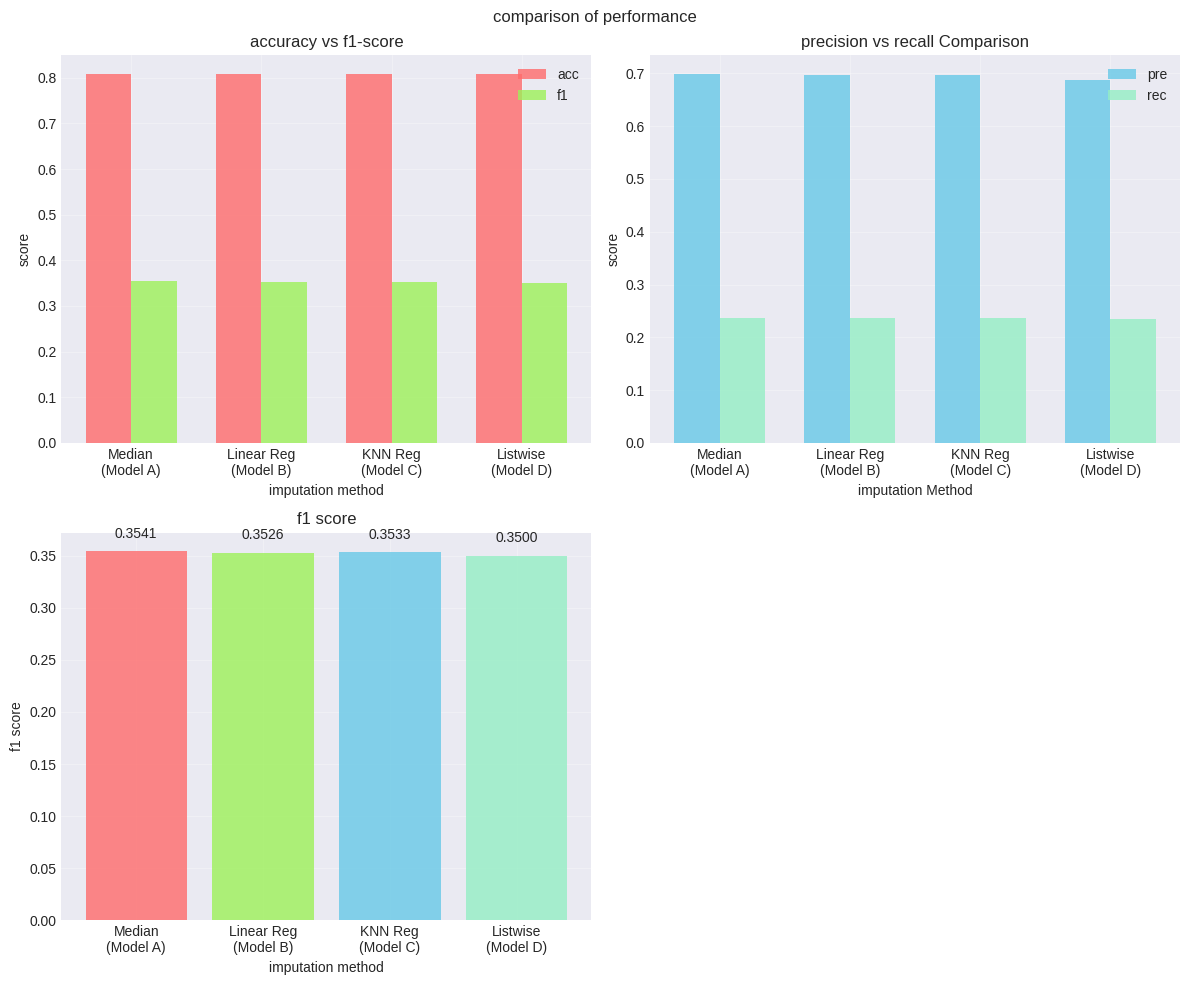

In [116]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('comparison of performance')

methods = ['Median\n(Model A)', 'Linear Reg\n(Model B)', 'KNN Reg\n(Model C)', 'Listwise\n(Model D)']
colors = ['#FF6B6B', "#9DF159", "#67C9E7", "#94EEC4"]

# plt 1
accuracy_scores = [results[name]['metrics']['Accuracy'] for name in ['A', 'B', 'C', 'D']]
f1_scores = [results[name]['metrics']['F1-Score'] for name in ['A', 'B', 'C', 'D']]

x = np.arange(len(methods))
width = 0.35

axes[0, 0].bar(x - width/2, accuracy_scores, width, label='acc', color=colors[0], alpha=0.8)
axes[0, 0].bar(x + width/2, f1_scores, width, label='f1', color=colors[1], alpha=0.8)
axes[0, 0].set_title('accuracy vs f1-score')
axes[0, 0].set_xlabel('imputation method')
axes[0, 0].set_ylabel('score')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(methods)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# precision recall plt
precision_scores = [results[name]['metrics']['Precision'] for name in ['A', 'B', 'C', 'D']]
recall_scores = [results[name]['metrics']['Recall'] for name in ['A', 'B', 'C', 'D']]

axes[0, 1].bar(x - width/2, precision_scores, width, label='pre', color=colors[2], alpha=0.8)
axes[0, 1].bar(x + width/2, recall_scores, width, label='rec', color=colors[3], alpha=0.8)
axes[0, 1].set_title('precision vs recall Comparison')
axes[0, 1].set_xlabel('imputation Method')
axes[0, 1].set_ylabel('score')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(methods)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# f1 plt
axes[1, 0].bar(methods, f1_scores, color=colors, alpha=0.8)
axes[1, 0].set_title('f1 score')
axes[1, 0].set_xlabel('imputation method')
axes[1, 0].set_ylabel('f1 score')
axes[1, 0].grid(True, alpha=0.3)

for i, v in enumerate(f1_scores):
    axes[1, 0].text(i, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.delaxes(axes[1,1])
plt.tight_layout()
plt.show()


### Efficacy Discussion

When comparing Listwise Deletion (Model D) to Imputation methods (Models A, B, and C), we see a clear trade-off. Listwise Deletion removed 2,923 rows, which accounted for 9.7% of the dataset. This reduction in data led to a lower performance, with an F1-score of 0.3500. On the other hand, the best imputation method, Median Imputation (Model A), achieved an F1-score of 0.3541. This suggests that imputation methods, by preserving more of the original data, resulted in a better learning signal for the model. The additional data allowed the model to perform slightly better, highlighting the advantage of imputing missing values rather than discarding rows entirely.

Next, when we compare Linear Regression (Model B) to Non-Linear KNN (Model C), we see that both models performed very similarly. This suggests that the relationship between AGE and other features in the dataset may be approximately linear. Alternatively, it could mean that the linear model was able to capture the most important patterns in the data, making the more complex KNN Regression unnecessary. In this case, the simpler linear approach seemed to be sufficient for the task at hand.

After analyzing these methods, the final recommendation is to use Median Imputation (Model A). This method achieved the highest F1-score of 0.3541 and effectively balanced precision and recall. The simplicity of the median imputation makes it a robust choice, providing good performance without the computational overhead of more complex methods. Additionally, it is less expensive computationally than both Linear Regression and KNN Regression, making it a more efficient option overall.

In terms of practical considerations, the computational cost of median imputation is the lowest, followed by linear regression, with KNN regression being the most computationally demanding. From a data preservation standpoint, imputation methods are clearly better than listwise deletion, as they maintain more of the dataset. Furthermore, simpler methods like median imputation are often easier to explain to stakeholders, enhancing their interpretability and making them more accessible for non-technical audiences.

Ultimately, the choice of imputation method has a significant impact on model performance. While simple techniques like median imputation are often sufficient and efficient, more complex methods such as regression-based imputation can provide better results when the Missing At Random (MAR) assumption holds, and when the relationships between variables are appropriately captured. The optimal imputation method depends on the specific dataset, the mechanism of missing data, and the computational resources available.
